In [57]:
import matplotlib.image as mpimg
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2
#import zipfile
from PIL import Image
  
from keras.callbacks import EarlyStopping
#from keras.preprocessing import image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from keras.utils import image_dataset_from_directory
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras import layers
from tensorflow import keras
#from layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split
#from zipfile import ZipFile
  
import warnings
warnings.filterwarnings('ignore')

In [58]:
#accesing path for dataset
data_path='c:\\ZHAW\\23FS\\KI\\DataForProject'
train_path='c:\\ZHAW\\23FS\\KI\\DataForProject\\Train'

#Variables for resizing
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

#Getting Total Nr of Classes from Train Folder
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [59]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [60]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = train_path + "\\" + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '\\' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_test = X_train
y_test = y_train

# rescalling
X_train = X_train.astype(np.float32) / 255
X_valid = X_valid.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [62]:
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

print("X_train Type:", X_train.dtype)
print("X_valid Type", X_valid.dtype)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)
X_test.shape (27446, 30, 30, 3)
y_test.shape (27446,)
X_train Type: float32
X_valid Type float32


In [63]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_valid = keras.utils.to_categorical(y_valid, NUM_CATEGORIES)

print(y_train.shape)
print(y_valid.shape)

(27446, 43)
(11763, 43)


In [64]:
#Creating data augementation layers
data_augmentation = tf.keras.Sequential([
  layers.RandomContrast(0.5),
  layers.RandomBrightness(0.5),
  layers.RandomZoom(.5, .2)
])

In [78]:
input_shape = (30, 30, 3)

model = Sequential()

# Data augmentation layer
data_augmentation = keras.layers.experimental.preprocessing.RandomRotation(0.1)
model.add(data_augmentation)

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))



In [79]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
858/858 [==============================] - 49s 52ms/step - loss: 2.0043 - accuracy: 0.4283 - val_loss: 0.5406 - val_accuracy: 0.8531
Epoch 2/15
858/858 [==============================] - 38s 44ms/step - loss: 0.7522 - accuracy: 0.7611 - val_loss: 0.1796 - val_accuracy: 0.9580
Epoch 3/15
858/858 [==============================] - 36s 42ms/step - loss: 0.4866 - accuracy: 0.8435 - val_loss: 0.1139 - val_accuracy: 0.9697
Epoch 4/15
858/858 [==============================] - 35s 41ms/step - loss: 0.3773 - accuracy: 0.8811 - val_loss: 0.0747 - val_accuracy: 0.9795
Epoch 5/15
858/858 [==============================] - 34s 40ms/step - loss: 0.3081 - accuracy: 0.9042 - val_loss: 0.0611 - val_accuracy: 0.9848
Epoch 6/15
858/858 [==============================] - 36s 42ms/step - loss: 0.2711 - accuracy: 0.9144 - val_loss: 0.0489 - val_accuracy: 0.9872
Epoch 7/15
858/858 [==============================] - 36s 41ms/step - loss: 0.2439 - accuracy: 0.9229 - val_loss: 0.0495 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

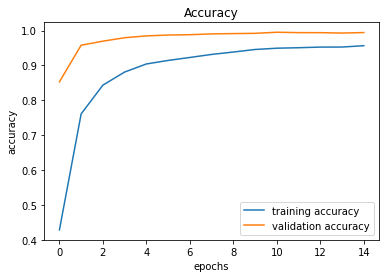

In [81]:
#accuracy
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

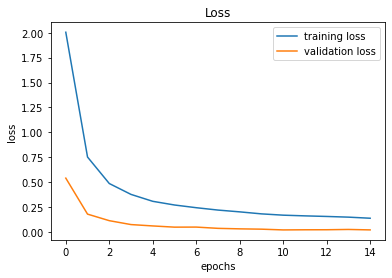

In [82]:
#Loss
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show

In [83]:
input_shape = (30, 30, 3)

model2 = Sequential()

# Data augmentation layer
data_augmentation = keras.layers.experimental.preprocessing.RandomRotation(0.1)
model2.add(data_augmentation)

# Convolutional layers
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))

model2.add(Flatten())

# Dense layers
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(43, activation='softmax'))

In [84]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
history2 = model2.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
858/858 [==============================] - 45s 49ms/step - loss: 2.0841 - accuracy: 0.4004 - val_loss: 0.7945 - val_accuracy: 0.7490
Epoch 2/25
858/858 [==============================] - 44s 52ms/step - loss: 0.9230 - accuracy: 0.7041 - val_loss: 0.2888 - val_accuracy: 0.9314
Epoch 3/25
858/858 [==============================] - 45s 52ms/step - loss: 0.5825 - accuracy: 0.8133 - val_loss: 0.1397 - val_accuracy: 0.9617
Epoch 4/25
858/858 [==============================] - 47s 55ms/step - loss: 0.4374 - accuracy: 0.8585 - val_loss: 0.0935 - val_accuracy: 0.9738
Epoch 5/25
858/858 [==============================] - 47s 55ms/step - loss: 0.3421 - accuracy: 0.8912 - val_loss: 0.0620 - val_accuracy: 0.9847
Epoch 6/25
858/858 [==============================] - 46s 54ms/step - loss: 0.2848 - accuracy: 0.9111 - val_loss: 0.0518 - val_accuracy: 0.9881
Epoch 7/25
858/858 [==============================] - 45s 52ms/step - loss: 0.2542 - accuracy: 0.9204 - val_loss: 0.0475 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

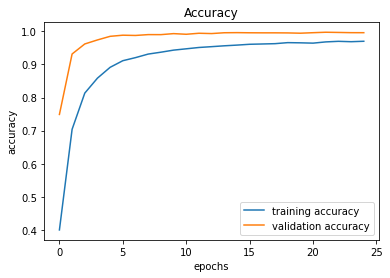

In [86]:
#accuracy
plt.figure(0)
plt.plot(history2.history['accuracy'],label='training accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

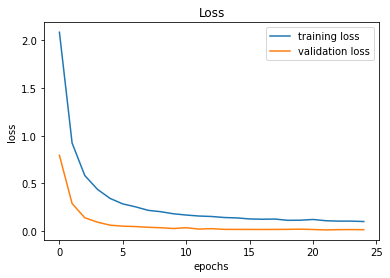

In [87]:
#Loss
plt.plot(history2.history['loss'],label='training loss')
plt.plot(history2.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show

In [88]:
test = pd.read_csv(data_path + '\\Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_path + '\\' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
# X_test = X_test/255

#pred = model.predict(X_test)
pred = np.argmax(model.predict(X_test),axis=1)


395/395 [==============================] - 3s 7ms/step


<AxesSubplot:>

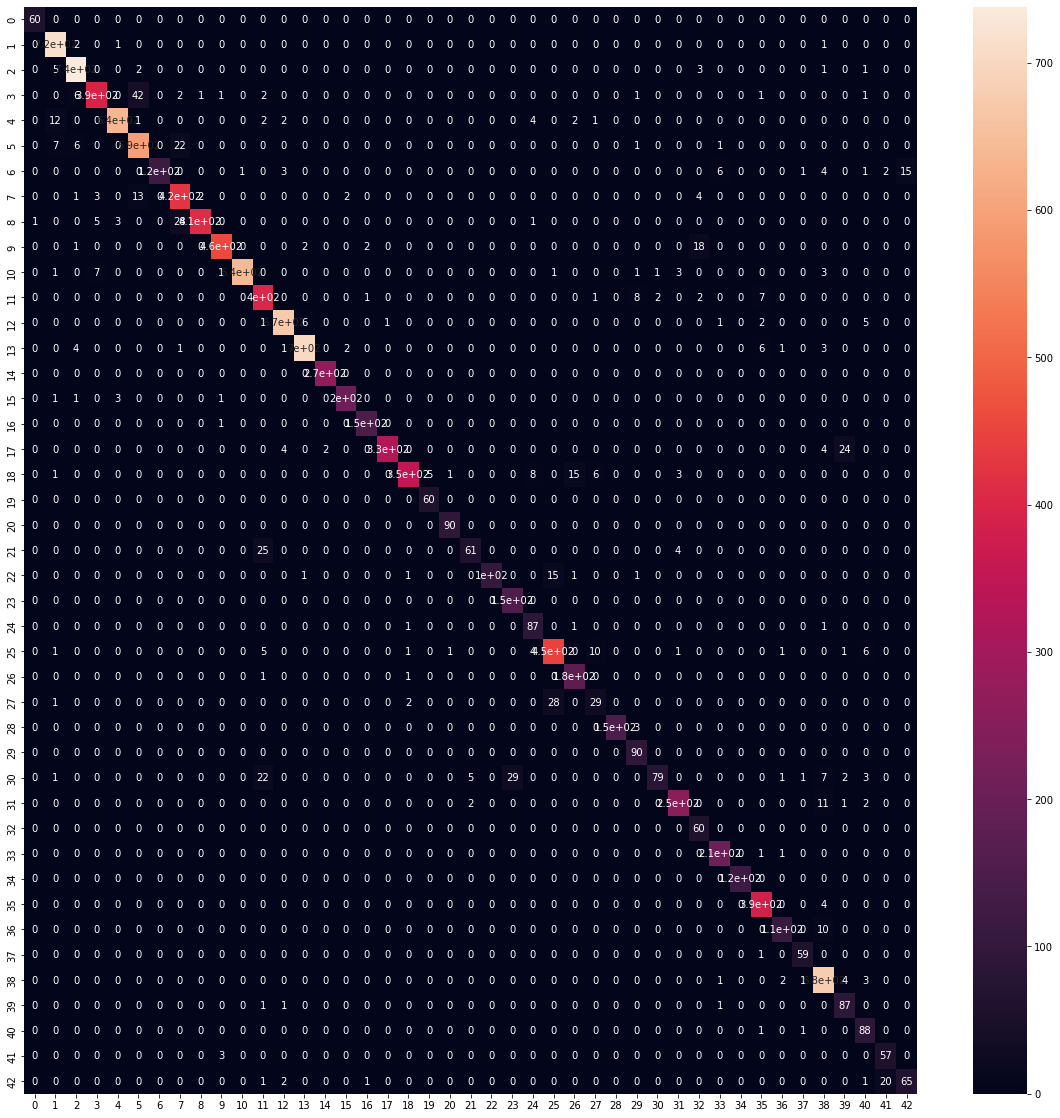

In [89]:
#Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [90]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.96      0.99      0.98       720
           2       0.97      0.98      0.98       750
           3       0.96      0.87      0.92       450
           4       0.99      0.96      0.98       660
           5       0.91      0.94      0.93       630
           6       1.00      0.78      0.88       150
           7       0.89      0.94      0.92       450
           8       0.99      0.92      0.95       450
           9       0.98      0.95      0.97       480
          10       1.00      0.97      0.99       660
          11       0.87      0.95      0.91       420
          12       0.98      0.98      0.98       690
          13       0.99      0.97      0.98       720
          14       0.99      1.00      1.00       270
          15       0.98      0.97      0.98       210
          16       0.97      0.99      0.98       150
          17       1.00    

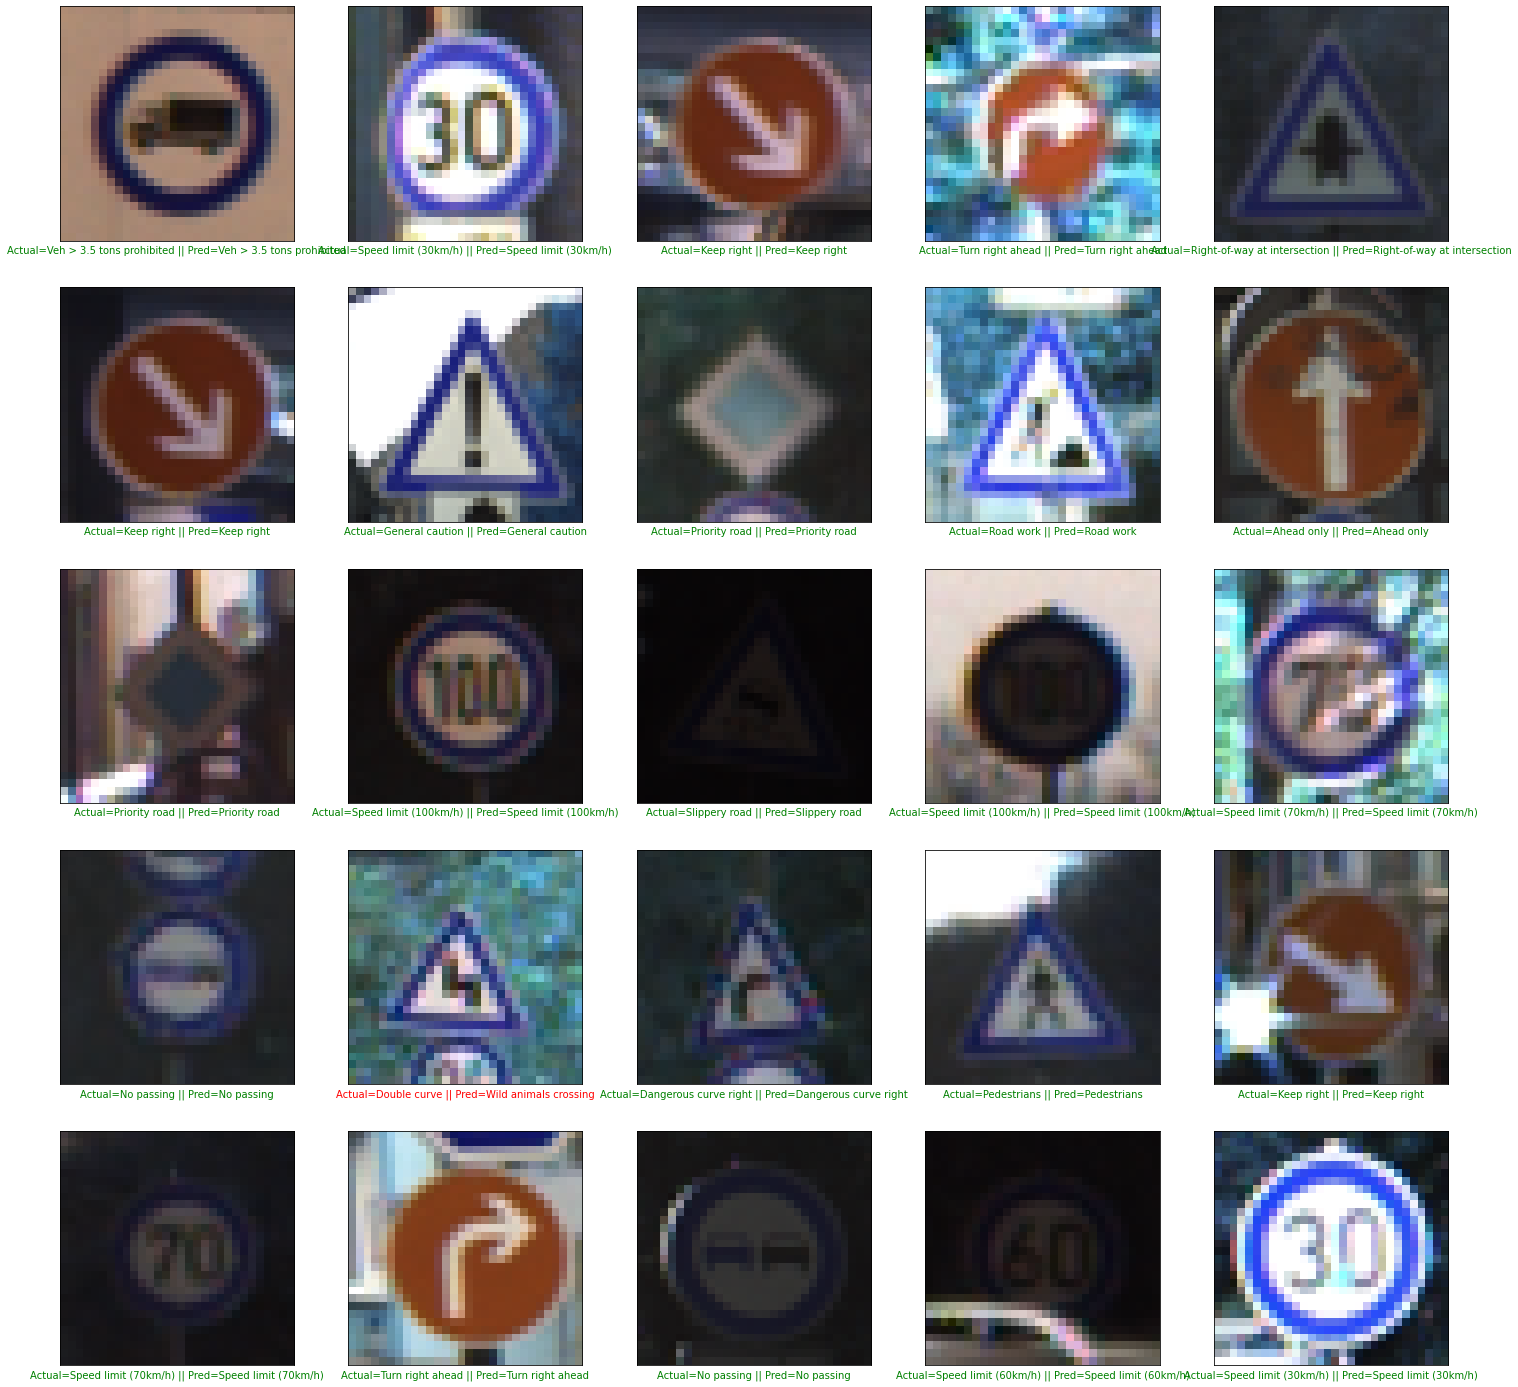

In [95]:
# Predictions on Test Data
plt.figure(figsize=(25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    prediction = pred[start_index + i]
    actual = labels[start_index + i]

    prediction_class = classes[prediction]
    actual_class = classes[actual]

    col = 'g'
    if prediction_class != actual_class:
        col = 'r'

    plt.xlabel('Actual={} || Pred={}'.format(actual_class, prediction_class), color=col)
    plt.imshow(X_test[start_index + i])

plt.show()


In [ ]:
model.save("streetsignmodel")

INFO:tensorflow:Assets written to: streetsignmodel\assets


INFO:tensorflow:Assets written to: streetsignmodel\assets
